In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import seed
from random import random

In [8]:
from sklearn.datasets import make_blobs

In [222]:
X, y = make_blobs(n_samples=1000, centers=4, n_features=2,random_state=1)

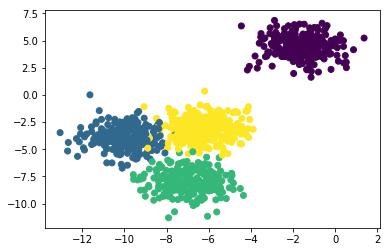

In [223]:
plt.scatter(X[:,0],X[:,1],c=y)

## Our task is to find the K cluster

## Algorithm: 
### First assign k cluster randomly
### then for each point assign the cluster which has lowest euclidian distance
### for each cluster shift the center of that cluster by taking the mean of the points
### then repeat step 2 again

### it depends on the initial assign of the cluster so use the Kmeans++
### use the DBSCAN for better clustering


In [224]:
def random_range(l,r):
    return random()*(r-l+1)+l

K=4

colors=["red","green","yellow","blue"]

clusters={}


rmx=X[0]
rmn=X[0]
for i in range(len(X)):
    rmn[0]=min(rmn[0],X[i][0])
    rmn[1]=min(rmn[1],X[i][1])
    
    rmx[0]=max(rmx[0],X[i][0])
    rmx[1]=max(rmx[1],X[i][1])

for i in range(K):
    clusters[i]={
        'col':colors[i],
        'points':[],
        'center':np.array([random_range(rmn[0],rmx[0]),random_range(rmn[1],rmx[1])])
    }

In [225]:
clusters

{0: {'col': 'red', 'points': [], 'center': array([-8.8136612 , -2.15945257])},
 1: {'col': 'green',
  'points': [],
  'center': array([-9.4700841 , -2.22812673])},
 2: {'col': 'yellow',
  'points': [],
  'center': array([-8.73118795, -1.99312748])},
 3: {'col': 'blue', 'points': [], 'center': array([-9.3772861 , -1.61788462])}}

In [226]:
def eculdian_dis(p1,p2):
    return np.sum((p1-p2)**2)

def assign_points(X):
    for j in range(K):
        clusters[j]['points']=[]
    for i in X:
        l=[]
        for j in range(K):
            l.append(eculdian_dis(i,np.array(clusters[j]['center']))) 
        #print(l)
        clusters[np.argmin(l)]['points'].append(i)



def plot_cluster(clusters):
    for i in range(K):
        for j in range(len(clusters[i]['points'])):
            plt.scatter(clusters[i]['points'][j][0],clusters[i]['points'][j][1],c=clusters[i]['col'])
            

def update_center(clusters):
    # taking the mean
    for i in range(K):
        #print(np.mean(np.array(clusters[i]['points']),axis=0))
        clusters[i]['center']=np.mean(np.array(clusters[i]['points']),axis=0)

#         plt.scatter(np.array(clusters[i]['points'][:,0]),np.array(clusters[i]['points'][:,1]),color=clusters[i]['color'])
        

In [227]:
#100 iteterations
for i in range(100):
    assign_points(X)
    update_center(clusters)
assign_points(X)

In [228]:
clusters

{0: {'col': 'red',
  'points': [array([-5.90962043, -7.80717036]),
   array([-6.3466658 , -8.89940182]),
   array([-7.9542131 , -8.03197315]),
   array([-6.7470243 , -8.57989539]),
   array([-6.41695737, -9.50487749]),
   array([-6.75755112, -8.08519607]),
   array([-6.89082772, -7.97528255]),
   array([-6.59334792, -6.83281019]),
   array([-7.3658129 , -7.90191847]),
   array([-5.67690837, -7.92702835]),
   array([-8.17670027, -9.33977981]),
   array([-7.71137321, -9.60221965]),
   array([-7.90093166, -8.04563317]),
   array([-6.02484373, -7.57996266]),
   array([-6.58757979, -8.39329767]),
   array([-7.84035262, -6.2557173 ]),
   array([-5.3764984 , -7.91590374]),
   array([-6.79105509, -8.32331167]),
   array([-6.78877943, -8.4002446 ]),
   array([-6.87568343, -6.9292921 ]),
   array([-6.5576306 , -8.26979553]),
   array([-7.05043377, -9.63280814]),
   array([-7.69928689, -8.6783315 ]),
   array([-7.41335332, -7.61552302]),
   array([-7.89302977, -8.26395652]),
   array([-9.23559324

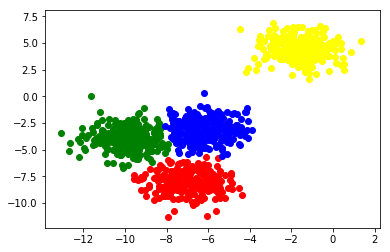

In [229]:
plot_cluster(clusters)

In [230]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, random_state=0).fit(X)

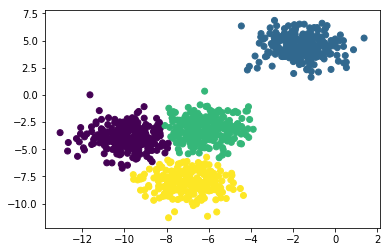

In [234]:
plt.scatter(X[:,0],X[:,1],c=km.labels_)
plt.show()